In [ ]:
import anndata as an
import pertpy as pt
import matplotlib.pyplot as plt
import pandas as pd



In [3]:

plot_data = pd.read_csv("../data/plot.data.fixed.2.csv")
signal_cols = ['CD86', 'CD30', 'CD38','IgD', 'CD27', 'IgM']
umap_cols = ['x', 'y']
meta_cols = ['PatientID', 'SampleID', 'SampleType', 'Timepoint', 'louvain_clusters', 'kmeans_clusters']

metadata = plot_data.loc[:,meta_cols]
metadata.index = metadata.index.astype(str)
metadata = metadata.astype(str)
umap_data = plot_data.loc[:,umap_cols]
signal_data = plot_data.loc[:,signal_cols]

In [3]:
adata = an.AnnData(obs=metadata)


In [ ]:
adata.X.shape

In [6]:
sccoda_model = pt.tl.Sccoda()
sccoda_data = sccoda_model.load(
  adata,
  type="cell_level",
  generate_sample_level=True,
  cell_type_identifier="louvain_clusters",
  sample_identifier="SampleID",
  covariate_obs=["Timepoint"]
)


In [10]:
adata

AnnData object with n_obs × n_vars = 297304 × 0
    obs: 'PatientID', 'SampleID', 'SampleType', 'Timepoint', 'louvain_clusters', 'kmeans_clusters', 'scCODA_sample_id'

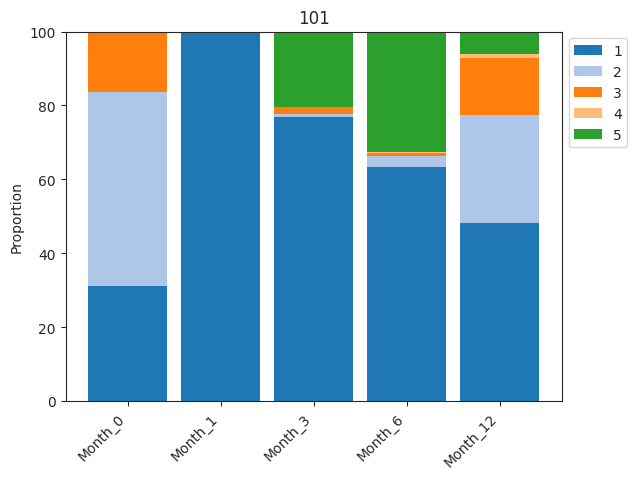

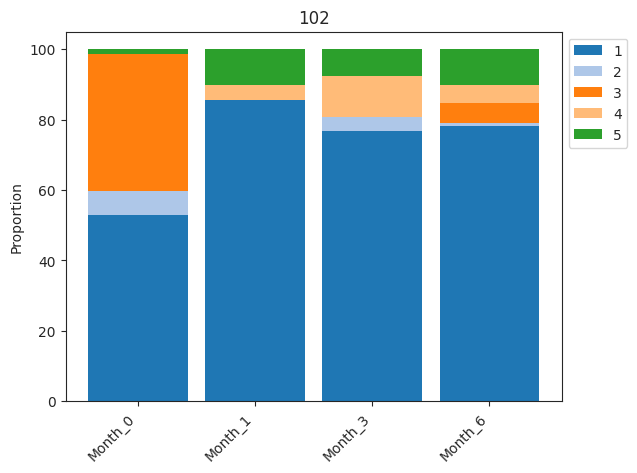

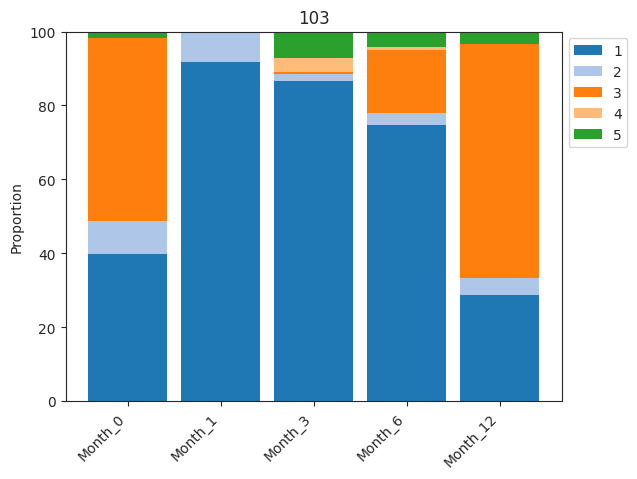

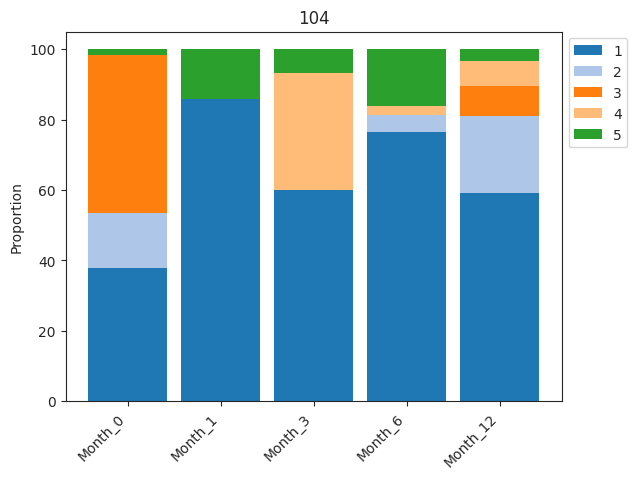

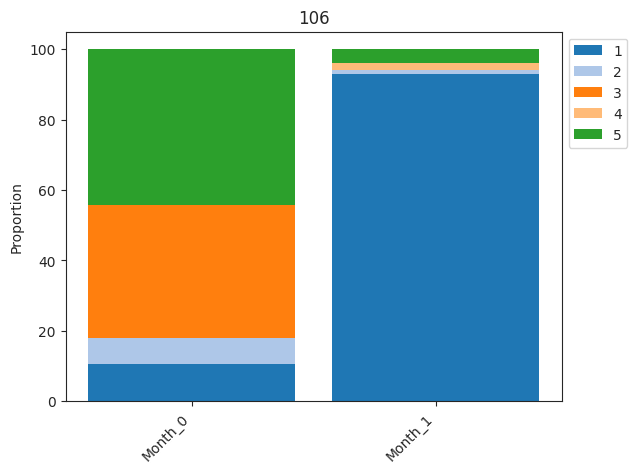

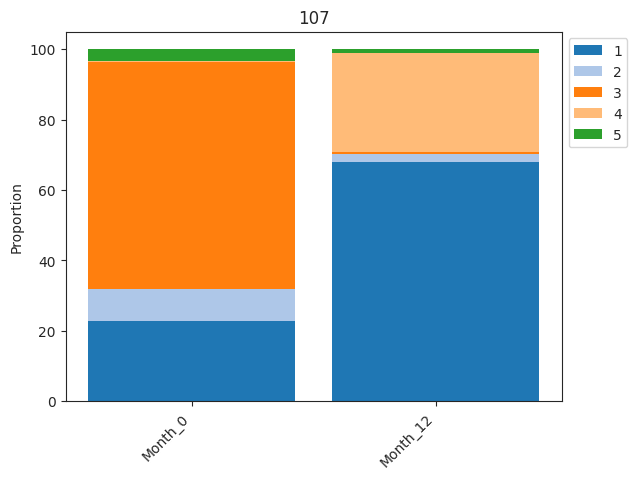

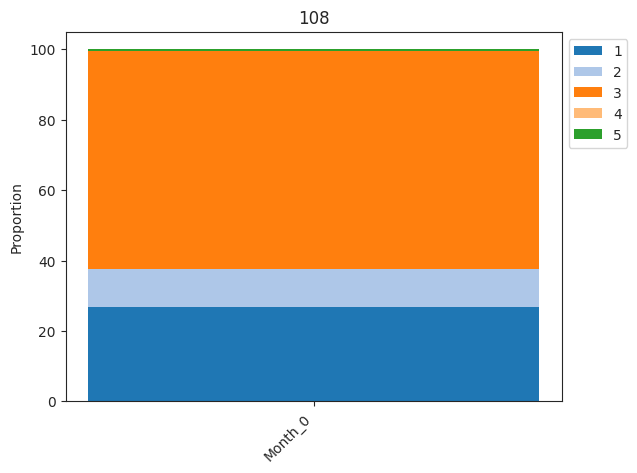

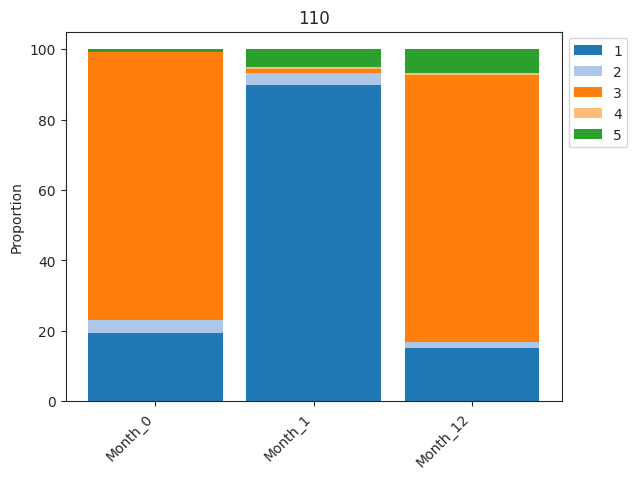

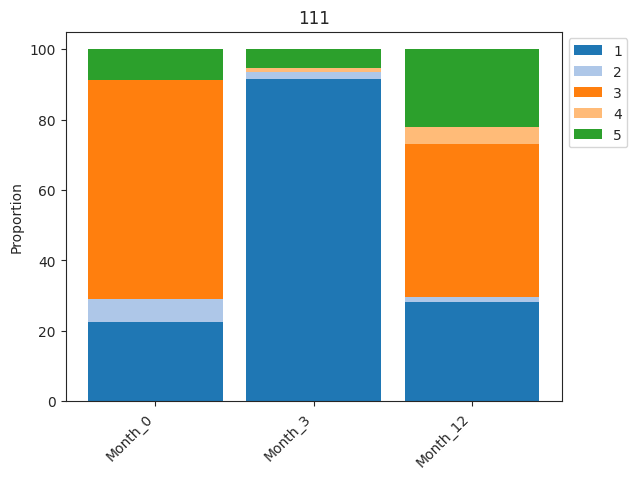

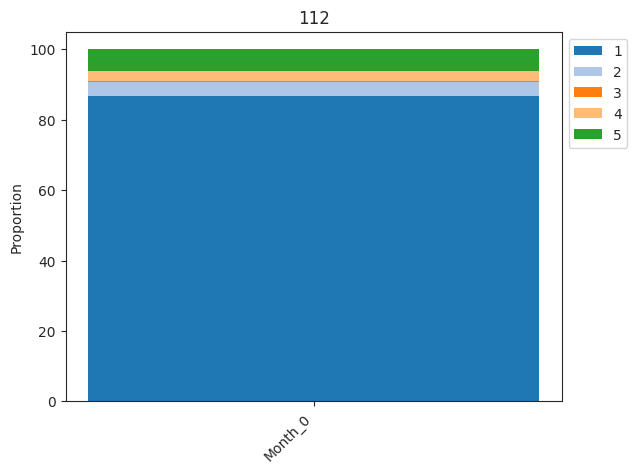

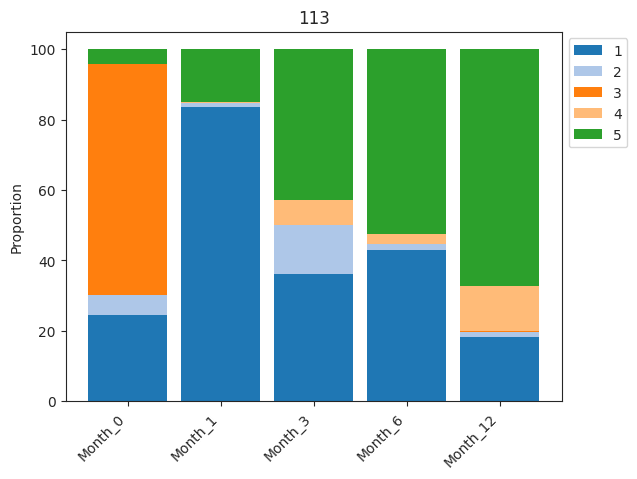

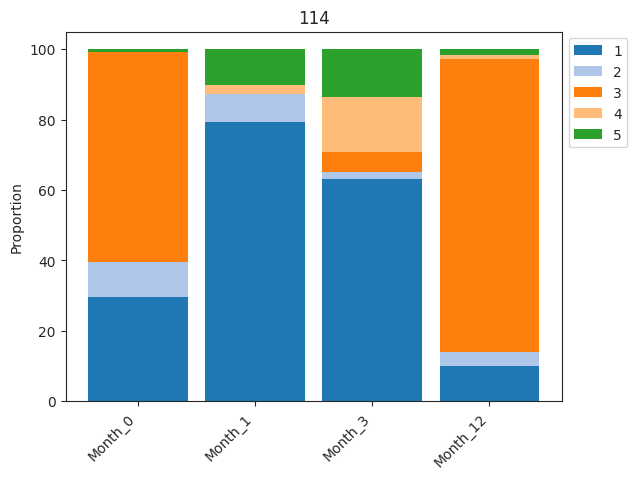

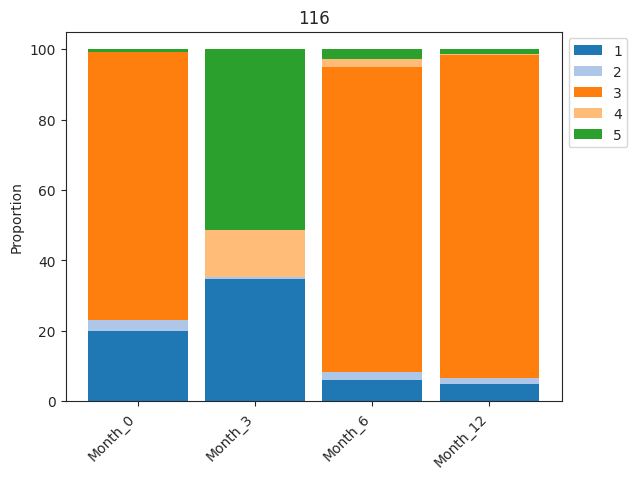

In [17]:

group_indices_dict = adata.obs.groupby("PatientID").groups

for group in group_indices_dict.keys():
    sccoda_model = pt.tl.Sccoda()
    indices = group_indices_dict[group]
    subset_data = adata[indices,:]
    
    sccoda_subset_data = sccoda_model.load(
    subset_data,
    type="cell_level",
    generate_sample_level=True,
    cell_type_identifier="louvain_clusters",
    sample_identifier="SampleID",
    covariate_obs=["Timepoint"]
    )
    pt.pl.coda.stacked_barplot(sccoda_subset_data, feature_name="Timepoint")
    plt.title(group)

<Axes: title={'center': 'Timepoint'}, ylabel='Proportion'>

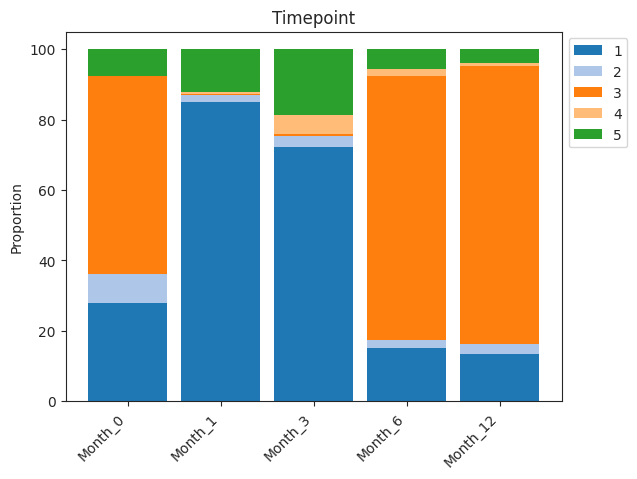

In [7]:
pt.pl.coda.stacked_barplot(sccoda_data, feature_name="Timepoint")

MuData object with n_obs × n_vars = 297304 × 5
  2 modalities
    rna:	297304 x 0
      obs:	'PatientID', 'SampleID', 'SampleType', 'Timepoint', 'louvain_clusters', 'kmeans_clusters', 'scCODA_sample_id'
    coda:	45 x 5
      obs:	'Timepoint', 'SampleID'
      var:	'n_cells'

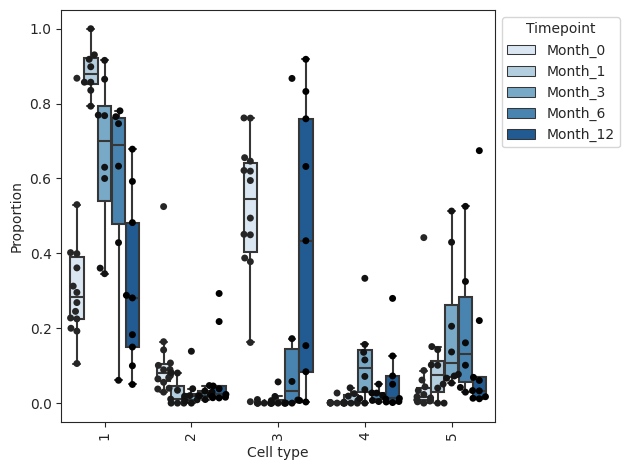

In [9]:
pt.pl.coda.boxplots(sccoda_data, feature_name="Timepoint", add_dots=True)


In [30]:
help(pt.pl.coda.boxplots)

Help on function boxplots in module pertpy.plot._coda:

boxplots(data: Union[anndata._core.anndata.AnnData, mudata._core.mudata.MuData], feature_name: str, modality_key: str = 'coda', y_scale: Literal['relative', 'log', 'log10', 'count'] = 'relative', plot_facets: bool = False, add_dots: bool = False, draw_effects: bool = False, model: pertpy.tools._coda._base_coda.CompositionalModel2 = None, cell_types: Optional[list] = None, args_boxplot: Optional[dict] = None, args_swarmplot: Optional[dict] = None, figsize: Optional[Tuple[float, float]] = None, dpi: Optional[int] = 100, cmap: Optional[str] = 'Blues', show_legend: Optional[bool] = True, level_order: List[str] = None) -> Union[matplotlib.axes._axes.Axes, seaborn.axisgrid.FacetGrid, NoneType]
    Grouped boxplot visualization. The cell counts for each cell type are shown as a group of boxplots,
        with intra--group separation by a covariate from data.obs.
    
    Args:
        data: AnnData object or MuData object
        feature

In [ ]:
sccoda_data = sccoda_model.prepare(sccoda_data, formula="Timepoint", reference_cell_type="automatic")
sccoda_model.run_nuts(sccoda_data)
sccoda_data

<Axes: xlabel='Presence', ylabel='Total dispersion'>

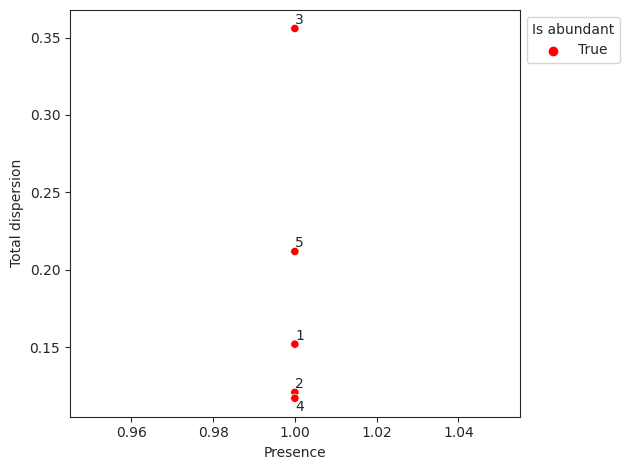

In [ ]:
pt.pl.coda.rel_abundance_dispersion_plot(sccoda_data, modality_key="coda", abundant_threshold=0.9)

In [ ]:
sccoda_model.summary(sccoda_data, est_fdr=0.1)


                                          Compositional Analysis summary                                           
┌─────────────────────────────────────────────┬───────────────────────────────────────────────────────────────────┐
│ Name                                        │ Value                                                             │
├─────────────────────────────────────────────┼───────────────────────────────────────────────────────────────────┤
│ Data                                        │ Data: 45 samples, 5 cell types                                    │
│ Reference cell type                         │ 1                                                                 │
│ Formula                                     │ Timepoint                                                         │
└─────────────────────────────────────────────┴───────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ Intercepts                                                                                                      │
├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│            Final Parameter  Expected Sample                                                                     │
│ Cell Type                                                                                                       │
│ 1               0.691          2692.049                                                                         │
│ 2              -0.632           716.987                                                                         │
│ 3               0.467          2151.795                                                                         │
│ 4              -1.348           350.394                                                                         │
│ 5              -0.662           695.797                                                                         │
└─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ Effects                                                                                                         │
├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│                                  Final Parameter  Expected Sample  log2-fold change                             │
│ Covariate             Cell Type                                                                                 │
│ Timepoint[T.Month_1]  1               0.000          3698.284            0.458                                  │
│                       2               0.000           984.983            0.458                                  │
│                       3              -1.804           486.519           -2.145                                  │
│                       4               0.000           481.364            0.458                                  │
│                       5               0.000           955.872            0.458                                  │
│ Timepoint[T.Month_12] 1               0.000          2692.049            0.000                                  │
│                       2               0.000           716.987            0.000                                  │
│                       3               0.000          2151.795            0.000                                  │
│                       4               0.000           350.394            0.000                                  │
│                       5               0.000           695.797            0.000                                  │
│ Timepoint[T.Month_3]  1               0.000          3444.540            0.356                                  │
│                       2               0.000           917.402            0.356                                  │
│                       3              -1.769           469.412           -2.197                                  │
│                       4               0.680           885.379            1.337                                  │
│                       5               0.000           890.289            0.356                                  │
│ Timepoint[T.Month_6]  1               0.000          3520.530            0.387                                  │
│                       2               0.000           937.641            0.387                                  │
│                       3              -1.282           780.694           -1.463                                  │
│                       4               0.000           458.228            0.387                                  │
│                       5               0.000           909.929            0.387                                  │
└─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

In [ ]:
sccoda_model.get_effect_df(sccoda_data)

Final Parameter  HDI 3%  HDI 97%     SD   
Covariate           Cell Type                                            
TimepointT.Month_1  1                 0.000000   0.000    0.000  0.000  \
                    2                 0.000000  -1.084    0.285  0.288   
                    3                -1.804349  -2.656   -0.871  0.459   
                    4                 0.000000  -0.537    0.818  0.204   
                    5                 0.000000  -0.564    0.761  0.190   
TimepointT.Month_12 1                 0.000000   0.000    0.000  0.000   
                    2                 0.000000  -0.546    0.386  0.156   
                    3                 0.000000  -1.030    0.142  0.309   
                    4                 0.000000  -0.239    0.869  0.252   
                    5                 0.000000  -0.385    0.556  0.159   
TimepointT.Month_3  1                 0.000000   0.000    0.000  0.000   
                    2                 0.000000  -1.069    0.280  0.290   
                    3                -1.769065  -2.622   -0.863  0.450   
                    4                 0.000000  -0.043    1.382  0.463   
                    5                 0.000000  -0.146    1.195  0.380   
TimepointT.Month_6  1                 0.000000   0.000    0.000  0.000   
                    2                 0.000000  -1.010    0.353  0.277   
                    3                -1.282183  -2.251   -0.309  0.527   
                    4                 0.000000  -0.514    0.946  0.259   
                    5                 0.000000  -0.311    1.121  0.325   

                               Inclusion probability  Expected Sample   
Covariate           Cell Type                                           
TimepointT.Month_1  1                         0.0000      3698.284198  \
                    2                         0.3776       984.982880   
                    3                         1.0000       486.518657   
                    4                         0.3089       481.364250   
                    5                         0.2980       955.872237   
TimepointT.Month_12 1                         0.0000      2692.048895   
                    2                         0.4076       716.987104   
                    3                         0.5830      2151.795425   
                    4                         0.5079       350.393866   
                    5                         0.4160       695.796932   
TimepointT.Month_3  1                         0.0000      3688.529668   
                    2                         0.3913       982.384907   
                    3                         1.0000       502.661990   
                    4                         0.6701       480.094612   
                    5                         0.5316       953.351045   
TimepointT.Month_6  1                         0.0000      3520.530098   
                    2                         0.4005       937.640725   
                    3                         0.9812       780.694156   
                    4                         0.3925       458.227989   
                    5                         0.4769       909.929254   

                               log2-fold change  
Covariate           Cell Type                    
TimepointT.Month_1  1                  0.458151  
                    2                  0.458151  
                    3                 -2.144974  
                    4                  0.458151  
                    5                  0.458151  
TimepointT.Month_12 1                  0.000000  
                    2                  0.000000  
                    3                  0.000000  
                    4                  0.000000  
                    5                  0.000000  
TimepointT.Month_3  1                  0.454341  
                    2                  0.454341  
                    3                 -2.097880  
                    4                  0.4543

In [ ]:
sccoda_model.credible_effects(sccoda_data)


Covariate              Cell Type
Timepoint[T.Month_1]   1            False
                       2            False
                       3             True
                       4            False
                       5            False
Timepoint[T.Month_12]  1            False
                       2            False
                       3            False
                       4            False
                       5            False
Timepoint[T.Month_3]   1            False
                       2            False
                       3             True
                       4            False
                       5            False
Timepoint[T.Month_6]   1            False
                       2            False
                       3             True
                       4            False
                       5            False
Name: Final Parameter, dtype: bool

In [ ]:
pt.pl.coda.effects_barplot(sccoda_data, parameter="Final Parameter")

In [60]:
counts = pd.Series(sccoda_data["coda"].X[:,2])
meta = pd.DataFrame(sccoda_data["coda"].obs).reset_index()
pd.concat([counts, meta], axis=1)


,0,scCODA_sample_id,Timepoint,SampleID
0,338.0,10,Month_0,10
1,7012.0,11,Month_0,11
2,7828.0,12,Month_0,12
3,4960.0,13,Month_0,13
4,6811.0,14,Month_0,14
5,10466.0,15,Month_0,15
6,4035.0,16,Month_0,16
7,11864.0,17,Month_0,17
8,10321.0,18,Month_0,18
9,9337.0,19,Month_0,19


# Plotting power analysis

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [10]:
power_data = pd.read_csv("../data/louvain cluster by timepoint.csv")

In [5]:
#python cell
from matplotlib import cm

def one_des_mcc(power, base, lf_inc, fdr=0.05):
    """ 
    quasibinomial regression directly on tpr
    
    calculates the number of required samples for 
    fixed MCC base increase and log-fold change using the fitted linear model
    
    step.model <- train(tpr ~ log.total  + log.fold.increase+ log.total:log.increase+log.increase:log.fold.increase, 
                        data = df3,
                        family=quasibinomial('logit'),
                        method = "glm", 
                        #tuneGrid = data.frame(nvmax = 1:4),
                        trControl = train.control
    )

    
import numpy as np21850 0.002838331
    

                       (Intercept)                      log.total 
                       -0.14044029                    -0.16678069 
                 log.fold.increase         log.total:log.increase 
                       -0.22374997                     0.06541749 
    log.increase:log.fold.increase 
                        0.05286727 
                        
                        
          parameter      RMSE  Rsquared        MAE      RMSESD  RsquaredSD       MAESD
    1      none 0.1013318 0.9374484 0.04944293 0.006237351 0.008033293 0.002772205

    Call:
    NULL

    Deviance Residuals: 
         Min        1Q    Median        3Q       Max  
    -2.44383  -0.16726  -0.05544   0.09365   1.63681  

    Coefficients:
                                     Estimate Std. Error t value Pr(>|t|)    
    (Intercept)                      -8.84886    0.26324 -33.615  < 2e-16 ***
    log.total                        -2.36269    0.18391 -12.847  < 2e-16 ***
    log.fold.increase                 0.30423    0.22163   1.373 0.169855    
    `log.total:log.increase`          0.96376    0.02818  34.199  < 2e-16 ***
    `log.fold.increase:log.increase`  0.13694    0.03899   3.512 0.000446 ***
    ---
                        
                        
    FDR 0.1
    =======
          nvmax      RMSE  Rsquared       MAE      RMSESD  RsquaredSD       MAESD
    1     1 0.2592998 0.6094817 0.1974915 0.003765617 0.011719968 0.014646427
    2     2 0.2002366 0.7671819 0.1626934 0.003099040 0.007373119 0.002861877
    3     3 0.1869059 0.7970950 0.1540439 0.002874103 0.006423662 0.002457849
    4     4 0.1838040 0.8038002 0.1485405 0.002984966 0.006527654 0.002542601
    5     5 0.1837587 0.8039079 0.1482092 0.002955405 0.006471140 0.002532354
    6     6 0.1837227 0.8039858 0.1480846 0.002956071 0.006469283 0.002538420
    
                           
                       (Intercept)                      log.total 
                       -0.11950939                    -0.19988348 
                 log.fold.increase         log.total:log.increase 
                       -0.15633159                     0.07211883 
    log.increase:log.fold.increase 
                        0.04186542
                        
                        
                        
                        
          parameter      RMSE  Rsquared        MAE      RMSESD  RsquaredSD      MAESD
    1      none 0.1034281 0.9377462 0.05263028 0.005585997 0.006886775 0.00227746

    Call:
    NULL

    Deviance Residuals: 
         Min        1Q    Median        3Q       Max  
    -2.07764  -0.18554  -0.05458   0.10948   1.57858  

    Coefficients:
                                     Estimate Std. Error t value Pr(>|t|)    
    (Intercept)                      -8.47729    0.21763 -38.952  < 2e-16 ***
    log.total                        -2.29206    0.14906 -15.376  < 2e-16 ***
    log.fold.increase                 0.38861    0.18319   2.121   0.0339 *  
    `log.total:log.increase`          0.94984    0.02372  40.043  < 2e-16 ***
    `log.fold.increase:log.increase`  0.14166    0.03355   4.223 2.43e-05 ***
    ---
                        
    FDR 0.2
    =======
          nvmax      RMSE  Rsquared       MAE      RMSESD  RsquaredSD       MAESD
    1     1 0.2229095 0.7235705 0.1821269 0.004007743 0.010047513 0.003034912
    2     2 0.2015349 0.7740882 0.1634163 0.004058530 0.008844275 0.002992189
    3     3 0.1905781 0.7980011 0.1574587 0.003093728 0.006244575 0.002613772
    4     4 0.1900927 0.7990345 0.1566968 0.003065029 0.006137400 0.002592080
    5     5 0.1901228 0.7989721 0.1565775 0.003080540 0.006163976 0.002574066
    6     6 0.1900494 0.7991302 0.1566087 0.003048576 0.006089995 0.002551471
    
                        (Intercept)                      log.total 
                       -0.41804833                    -0.11288208 
                      log.increase         log.total:log.increase 
                        0.06954384                     0.05325303 
    log.increase:log.fold.increase 
                        0.01634580 

    
    
          parameter      RMSE  Rsquared       MAE      RMSESD  RsquaredSD       MAESD
    1      none 0.1071722 0.9361466 0.0594997 0.004124034 0.004936544 0.001898583

    Call:
    NULL

    Deviance Residuals: 
         Min        1Q    Median        3Q       Max  
    -2.29471  -0.20850  -0.05276   0.13819   1.42878  

    Coefficients:
                                     Estimate Std. Error t value Pr(>|t|)    
    (Intercept)                      -7.89518    0.16682 -47.328  < 2e-16 ***
    log.total                        -1.82765    0.11568 -15.799  < 2e-16 ***
    log.fold.increase                 0.11681    0.15386   0.759    0.448    
    `log.total:log.increase`          0.85017    0.01949  43.624  < 2e-16 ***
    `log.fold.increase:log.increase`  0.23545    0.03058   7.700 1.45e-14 ***
    ---
    
    """
    
    # parameter sets old via leapbackwards
    #param_sets = {"0.2":{"inter":-7.89518, "log_total":-1.82765 , "log_inc": 0.0 , "log_fold_inc":0.11681, "log_total_log_inc": 0.85017, "log_inc_log_fold_inc":0.23545},
    #              "0.1":{"inter":-0.11950939, "log_total":-0.19988348, "log_inc":0.0, "log_fold_inc":-0.15633159, "log_total_log_inc":0.07211883, "log_inc_log_fold_inc":0.04186542},
    #              "0.05":{"inter":-0.14044029, "log_total":-0.16678069, "log_inc":0.0, "log_fold_inc":-0.22374997, "log_total_log_inc":0.06541749, "log_inc_log_fold_inc":0.05286727}
    #             }
    
    
    param_sets = {"0.2":{"inter":-7.89518, "log_total":-1.82765 , "log_inc": 0.0 , "log_fold_inc":0.11681, "log_total_log_inc": 0.85017, "log_inc_log_fold_inc":0.23545},
                  "0.1":{"inter":-8.47729, "log_total":-2.29206, "log_inc":0.0, "log_fold_inc":0.38861, "log_total_log_inc":0.94984, "log_inc_log_fold_inc":0.14166},
                  "0.05":{"inter":-8.84886, "log_total":-2.36269, "log_inc":0.0, "log_fold_inc":0.30423, "log_total_log_inc":0.96376, "log_inc_log_fold_inc":0.13694}
                 }
        
    try:
        prms = param_sets[str(round(fdr,2))]
        tpr = power
        #base = base
        inc = 5000*base
        log_inc = np.log(inc)

        # invers regress sample size
        log_samples = - (prms["inter"] + prms["log_inc"]*lf_inc +prms["log_fold_inc"]*lf_inc +prms["log_inc_log_fold_inc"]*lf_inc*log_inc - tpr)/(prms["log_total_log_inc"]*log_inc+ prms["log_total"])
        nof_sample = np.exp(log_samples)
        nof_sample[nof_sample<= 0.0] = 1
        nof_sample[nof_sample > 60] = 60
        nof_sample = np.nan_to_num(nof_sample, posinf=80, neginf=-50)
        return np.round(nof_sample)
    except:
        raise TypeError("Only FDRs of 0.5, 0.1, 0.2 allowed")

In [6]:
#Power analysis plot

class nf(float):
    def __repr__(self):
        s = f'{self:.1f}'
        return f'{self:.0f}' if s[-1] == '0' else s


base_counts = np.arange(0.01, 0.701, 0.01)
log_fold_inc = np.arange(0.01, 3.01, 0.01)

X, Y = np.meshgrid(base_counts, log_fold_inc)
X= X
Z = one_des_mcc(0.8, X, Y,fdr=0.05)

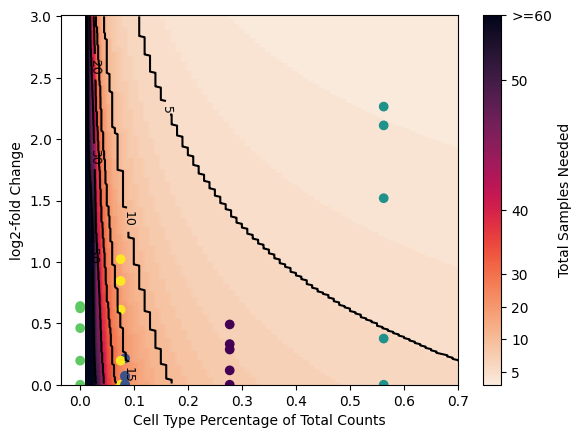

In [7]:
levels=[2,5,10,15,20,30,50,60]
#
contours = plt.contour(X, Y, Z,  levels=levels,  origin="upper", colors='black')
plt.clabel(contours, contours.levels, inline=1, fontsize=9, fmt="%1.0f")


plt.imshow(Z, origin='lower',extent=[ 0.01,0.7,0.0,3.01],
           cmap=sns.cm.rocket_r, aspect='auto')

cbar = plt.colorbar(label="Total Samples Needed",ticks=[2,5,10,15,20,30,50,60])
cbar.ax.set_yticklabels(["2", "5", "10","20","30","40", "50", ">=60"]) 

plt.xlabel("Cell Type Percentage of Total Counts")
plt.ylabel("log2-fold Change")

#fig, ax = plt.subplots(1, sharex = True, sharey=True)

plt.scatter(power_data.Baseline_percent/100, power_data.l2fc_from_B.abs(), c=power_data.louvain_clusters)
# plt.savefig("power_analysis_logit_reg_FDR005.pdf")

In [44]:
power_data

,Timepoint,louvain_clusters,n,sum_clusters,percentage,sum_of_samples,l2fc_from_B,Sig_Diff,Power_.05,Baseline_percent,Change
0,0,1,61194,220562,27.744580,13,0.000,NaN,NaN,27.744580,NaN
1,0,2,18482,220562,8.379503,13,0.000,NaN,NaN,8.379503,NaN
2,0,3,124035,220562,56.235888,13,0.000,NaN,NaN,56.235888,NaN
3,0,4,168,220562,0.076169,13,0.000,NaN,NaN,0.076169,NaN
4,0,5,16683,220562,7.563860,13,0.000,NaN,NaN,7.563860,NaN
5,1,1,4279,5038,84.934498,8,0.491,False,True,27.744580,SAME
6,1,2,104,5038,2.064311,8,-0.001,False,False,8.379503,NaN
7,1,3,13,5038,0.258039,8,-2.112,True,True,56.235888,LESS
8,1,4,28,5038,0.555776,8,0.641,False,False,0.076169,NaN
9,1,5,614,5038,12.187376,8,0.611,False,False,7.563860,NaN


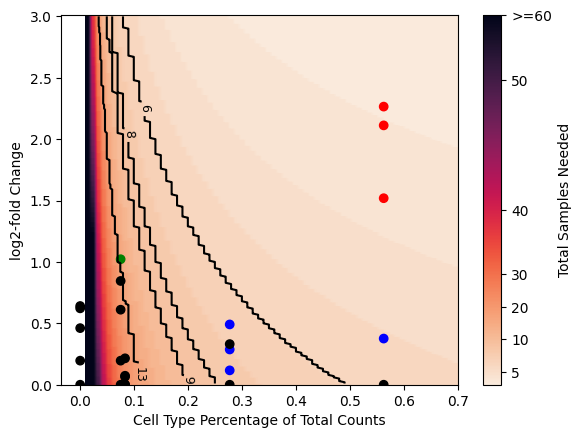

In [18]:
levels=[6, 8, 9, 13]
#
contours = plt.contour(X, Y, Z,  levels=levels,  origin="upper", colors='black')
plt.clabel(contours, contours.levels, inline=1, fontsize=9, fmt="%1.0f")


plt.imshow(Z, origin='lower',extent=[ 0.01,0.7,0.0,3.01],
           cmap=sns.cm.rocket_r, aspect='auto')

cbar = plt.colorbar(label="Total Samples Needed",ticks=[2,5,10,15,20,30,50,60])
cbar.ax.set_yticklabels(["2", "5", "10","20","30","40", "50", ">=60"]) 

plt.xlabel("Cell Type Percentage of Total Counts")
plt.ylabel("log2-fold Change")

#fig, ax = plt.subplots(1, sharex = True, sharey=True)

plt.scatter(power_data.Baseline_percent/100, power_data.l2fc_from_B.abs(), c=power_data.Color)
plt.savefig("power_analysis_logit_reg_FDR005.svg")